В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало 50 испытуемых, проходивших собеседование на программу. Каждый из них разговаривал с рекрутером; в конце 34 из 50 бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания 10 из 34 испытуемых экспериментальной группы и 4 из 16 испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно 4.4%. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости при альтернативе заразительности зевоты, округлите до четырёх знаков после десятичной точки.

## Z-критерий для разности долей (независимые выборки)

  $ $|$X_1$ | $X_2$  
  --- | --- | ---
  1  | a | b 
  0  | c | d 
  $\sum$ | $n_1$| $n_2$
  
$$ \hat{p}_1 = \frac{a}{n_1}$$

$$ \hat{p}_2 = \frac{b}{n_2}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\; \hat{p}_1 - \hat{p}_2 \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$
$$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

In [20]:
from scipy import stats
import numpy as np

n1 = 34
n2 = 16

p1 = 10. / n1
p2 = 4. / n2

P = float(p1*n1 + p2*n2) / (n1 + n2)
    
z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

round(1 - stats.norm.cdf(z_stat), 4)

0.3729

---

Имеются данные измерений двухсот швейцарских тысячефранковых банкнот, бывших в обращении в первой половине XX века. Сто из банкнот были настоящими, и сто — поддельными. На рисунке ниже показаны измеренные признаки:

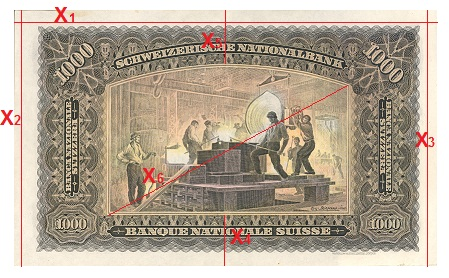

Загрузите данные:
banknotes.txt

Отделите 50 случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На оставшихся 150 настройте два классификатора поддельности банкнот:

1) логистическая регрессия по признакам $X_1, X_2, X_3$ 

2) логистическая регрессия по признакам $X_4, X_5, X_6$

Каждым из классификаторов сделайте предсказания меток классов на тестовой выборке. Одинаковы ли доли ошибочных предсказаний двух классификаторов? Проверьте гипотезу, вычислите достигаемый уровень значимости. Введите номер первой значащей цифры (например, если вы получили $5.5\times10^{-8}$, нужно ввести $8$.

In [79]:
import pandas as pd

df_bank = pd.read_csv('banknotes.txt', sep='\t')
df_bank.info()
df_bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   X3      200 non-null    float64
 3   X4      200 non-null    float64
 4   X5      200 non-null    float64
 5   X6      200 non-null    float64
 6   real    200 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


X1     X2     X3    X4    X5     X6  real
0  214.8  131.0  131.1   9.0   9.7  141.0     1
1  214.6  129.7  129.7   8.1   9.5  141.7     1
2  214.8  129.7  129.7   8.7   9.6  142.2     1
3  214.8  129.7  129.6   7.5  10.4  142.0     1
4  215.0  129.6  129.7  10.4   7.7  141.8     1

In [92]:
from sklearn import model_selection, linear_model, preprocessing, metrics

X = df_bank.iloc[:, :-1]
y = df_bank['real']

scaled = preprocessing.StandardScaler()
X_scaled = scaled.fit_transform(X)

In [93]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_scaled, y,
                                                                    test_size=50, random_state=1)

reg1 = linear_model.LogisticRegression().fit(X_train[:, :3], y_train)
reg2 = linear_model.LogisticRegression().fit(X_train[:, 3:], y_train)

In [106]:
y1_pred = reg1.predict(X_test[:, :3])
y2_pred = reg2.predict(X_test[:, 3:])

## Z-критерий для разности долей (связанные выборки)

$X_1$ \ $X_2$ | 1 | 0 | $\sum$
--- | --- | --- | ---
1  | e | f | e+f
0  | g | h | g+h
$\sum$ | e+g | f+h | n
  
$$ \hat{p}_1 = \frac{e + f}{n}$$

$$ \hat{p}_2 = \frac{e + g}{n}$$

$$ \hat{p}_1 - \hat{p}_2 = \frac{f - g}{n}$$


$$\text{Доверительный интервал для }p_1 - p_2\colon \;\;  \frac{f - g}{n} \pm z_{1-\frac{\alpha}{2}}\sqrt{\frac{f + g}{n^2} - \frac{(f - g)^2}{n^3}}$$

$$Z-статистика: Z({X_1, X_2}) = \frac{f - g}{\sqrt{f + g - \frac{(f-g)^2}{n}}}$$

In [125]:
n = len(y_test)
p1 = sum(abs(y1_pred - y_test)) / n
p2 = sum(abs(y2_pred - y_test)) / n

sample = list(zip(abs(y1_pred - y_test), abs(y2_pred - y_test)))
f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])

z_stat = float(f - g) / np.sqrt(f + g - float((f - g)**2) / n)
2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))

0.004331039182363217

В предыдущей задаче посчитайте 95% доверительный интервал для разности долей ошибок двух классификаторов. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после десятичной точки.

In [128]:
left_boundary = float(f - g) / n  - z_stat * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
right_boundary = float(f - g) / n  + z_stat * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)

round(left_boundary, 4)

-0.0

---

Ежегодно более 200000 людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет 525 баллов, стандартное отклонение — 100 баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — 541.4. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости 0.05 нулевая гипотеза? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [123]:
nu = 525
sigma = 100
n = 100

z_stat = (541.4 - nu) / (float(sigma) / np.sqrt(n))
round(stats.norm.sf(z_stat), 4)

0.0505

Оцените теперь эффективность подготовительных курсов, средний балл 100 выпускников которых равен 541.5. Отвергается ли на уровне значимости 0.05 та же самая нулевая гипотеза против той же самой альтернативы? Введите достигаемый уровень значимости, округлённый до 4 знаков после десятичной точки.

In [124]:
z_stat = (541.5 - nu) / (float(sigma) / np.sqrt(n))
round(stats.norm.sf(z_stat), 4)

0.0495